In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
import re

# Dataset Exploration

In [2]:
df=pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')
print(df)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.describe()   #dataframe description

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.columns.tolist()   #checking the columns

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [7]:
#checking missing values
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#duplicate values
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218415
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [9]:
#accounting for null values as summary is imp
df['Summary'].fillna('No Summary provided',inplace=True)

# Exploratory Data Analysis

**Univariate Analysis**

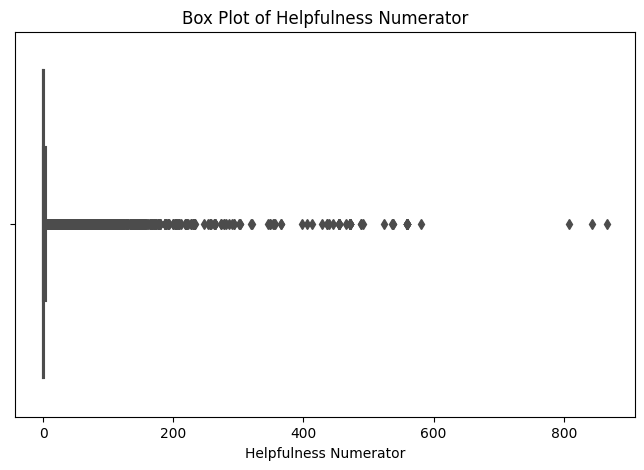

In [10]:
#Box plot for helpfulness numerator
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HelpfulnessNumerator'], color='orange')
plt.title("Box Plot of Helpfulness Numerator")
plt.xlabel("Helpfulness Numerator")
plt.show()

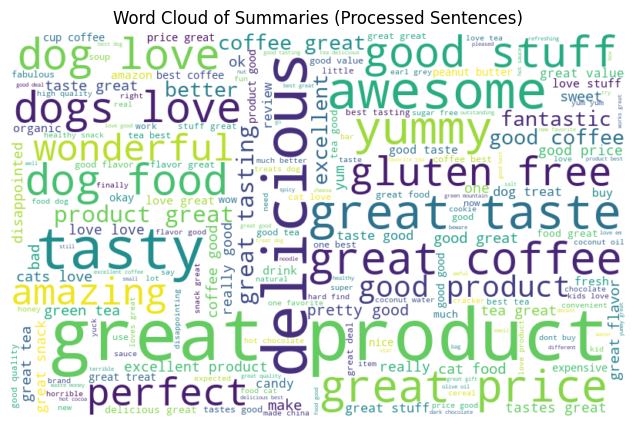

In [11]:
#word cloud for summary
stopwords=set(STOPWORDS)

text_sentences=' '.join(str(summary) for summary in df['Summary'].dropna())  #dropna() to drop null vals

text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text_sentences.lower())  #convert to lowercase and remove any special characters , r'[^a-zA-Z\s]' negates characters and spaces if you want special characters to include you can keep that in this

filtered_text = " ".join(word for word in text_cleaned.split() if word not in stopwords and len(word) > 1)

word_cloud_sentence=WordCloud(width=800,height=500,background_color='white').generate_from_text(filtered_text)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud_sentence,interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Summaries (Processed Sentences)")
plt.show()

 **Bivariate Analysis** \
When doing a bivariate analysis, two variables are examined simultaneously in order to look for patterns, dependencies, or interactions between them. 

If the plot is diagonal , histograms of kernel density plots , is shows the distribution of the individual variables.
If the scatter plot is in the lower triangle, it displays the relationship between the pairs of the variables.
If the scatter plots above and below the diagonal are mirror images, indicating symmetry.
If the histogram plots are more centered, it represents the locations of peaks.
Skewness is depicted by observing whether the histogram is symmetrical or skewed to the left or right.

<Figure size 1000x800 with 0 Axes>

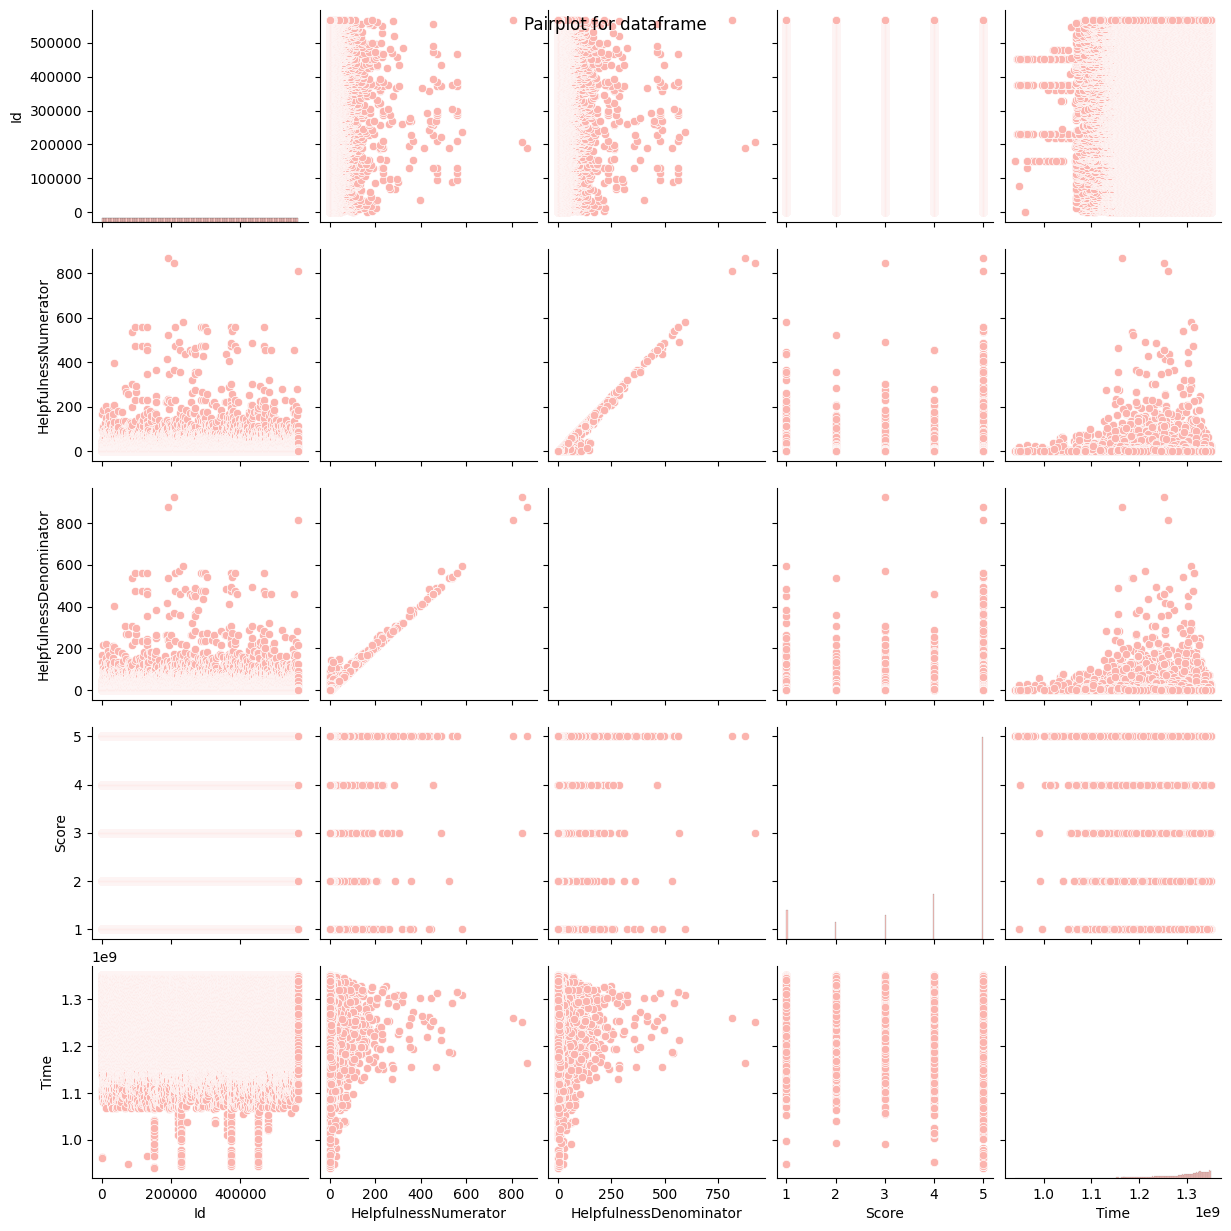

In [12]:
sns.set_palette('Pastel1')
plt.figure(figsize=(10,8))
sns.pairplot(df)

plt.suptitle('Pairplot for dataframe')
plt.show()

**Multivariate Analysis** \
Interactions between three or more variables in a dataset are simultaneously analyzed and interpreted in multivariate analysis.

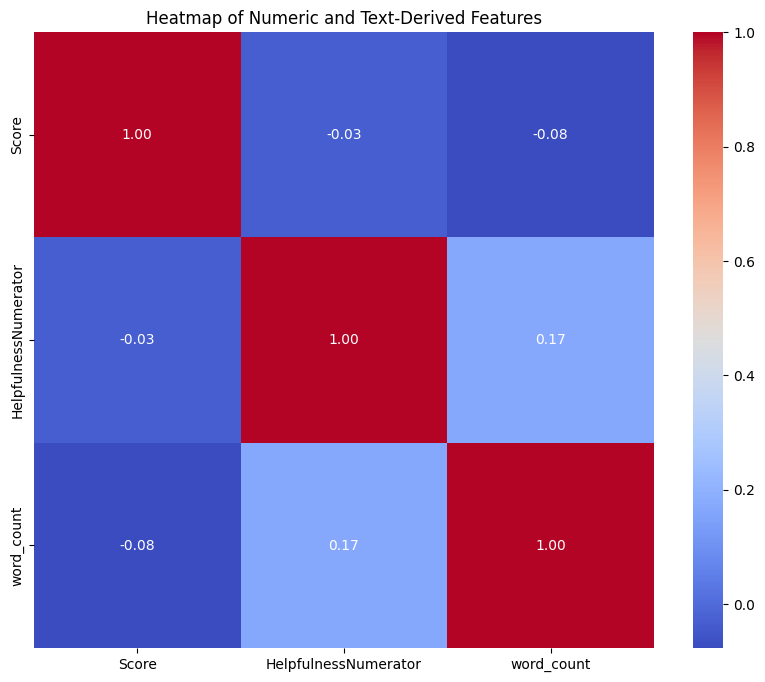

In [13]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Score', 'HelpfulnessNumerator', 'word_count']].corr(), annot=True,fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Numeric and Text-Derived Features")
plt.show()

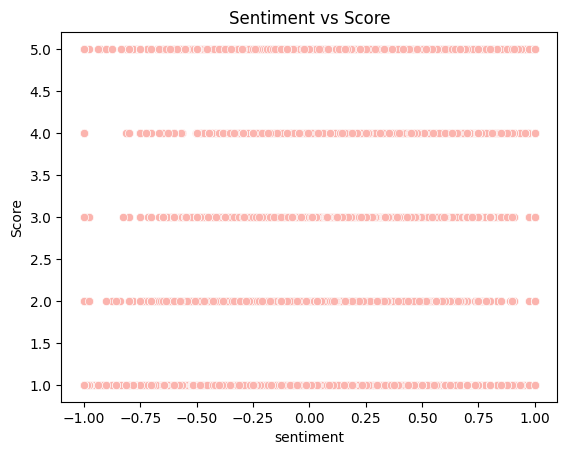

In [14]:
# Compute sentiment polarity
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.scatterplot(x='sentiment', y='Score', data=df)
plt.title('Sentiment vs Score')
plt.show()

# Collaborative Filtering with Surprise Lib

In [15]:
from surprise import Dataset,Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [16]:
df_small = df.sample(n=50000)  

reader = Reader(rating_scale=(1, 5))  #rating values
data = Dataset.load_from_df(df_small[['UserId', 'ProductId', 'Score']], reader)  #surprise expects three parameters(userid,productid,score)

trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {"name": "cosine","user_based": True} #user-user similarity config
algo = KNNBasic(k=40, sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)


accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3367


1.3366686556254255

# Content Based Filtering 

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Ensure column names are strings
df.columns = df.columns.astype(str)

# Prepare product data
df_prods = df[['ProductId', 'Text']].drop_duplicates()  # Ensure unique products

# Fill missing review text with an empty string
df_prods['ReviewText'] = df_prods['Text'].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_prods['Text'])

# Fit Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute')
nn_model.fit(tfidf_matrix)

# Map ProductId to index
prod_ind = pd.Series(df_prods.index, index=df_prods['ProductId']).drop_duplicates()


# Predictions

CBF Pred

In [21]:
# Recommendation function
def recommend(product_id, num_recommendations=5):
    idx = prod_ind[product_id]
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations + 1)
    similar_indices = indices.flatten()[1:]  # Exclude the input product itself
    similar_products = df_prods.iloc[similar_indices]['ProductId'].tolist()
    return similar_products

example_product_id = 'B003TQQKFQ'
recommended_products = recommend(example_product_id, num_recommendations=5)
print(f"Products similar to {example_product_id}: {recommended_products}")

Products similar to B003TQQKFQ: ['B000NMCQ9S', 'B005CMA7QS', 'B0001I1HFS', 'B000FPKMK8', 'B001ABOB8K', 'B003TQQKFQ', 'B0017GAT70', 'B0005ZYSHQ', 'B0083QJU5O', 'B0019MYZGS', 'B004D9VYEK']


Collaborative Filtering Pred

In [22]:
# Predict for a specific user and product
user_id = 'A1PTPN5SY7C7SW'  
product_id = 'B000G6RYNE' 
pred = algo.predict(user_id, product_id)
print(f"Predicted rating for User {user_id} and Product {product_id}: {pred.est}")

Predicted rating for User A1PTPN5SY7C7SW and Product B000G6RYNE: 4.179125
